In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/project')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preprocessing**

In [ ]:
# Data Loading
data_train = pd.read_csv('nsl-kdd/KDDTrain+.txt', header=None)
data_test = pd.read_csv('nsl-kdd/KDDTest+.txt', header=None)

In [ ]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])


In [ ]:
data_train.columns = columns
data_test.columns = columns


In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
outcome_counts = data_train['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
outcome_counts = data_test['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,9711
neptune,4657
guess_passwd,1231
mscan,996
warezmaster,944
apache2,737
satan,735
processtable,685
smurf,665


In [ ]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


# **Data Cleaning**

In [ ]:
null_train = data_train.isnull().sum()
null_test = data_test.isnull().sum()

print("Null values in training data:\n", null_train)
print("Null values in test data:\n", null_test)


Null values in training data:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rat

In [ ]:
duplicates_train = data_train.duplicated().sum()
duplicates_test = data_test.duplicated().sum()

print("Duplicate rows in training data:", duplicates_train)
print("Duplicate rows in test data:", duplicates_test)


Duplicate rows in training data: 0
Duplicate rows in test data: 0


In [ ]:
train_target_counts = data_train['outcome'].value_counts()
test_target_counts = data_test['outcome'].value_counts()


In [ ]:
print("Value counts of the outcome column in training data:\n", train_target_counts)

Value counts of the outcome column in training data:
 outcome
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [ ]:
print("\nValue counts of the outcome column in test data:\n", test_target_counts)


Value counts of the outcome column in test data:
 outcome
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64


In [ ]:
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

# Align columns of test set with train set to ensure they have the same features
data_test = data_test.reindex(columns=data_train.columns, fill_value=0)

print("Preprocessed training data shape:", data_train.shape)
print("Preprocessed test data shape:", data_test.shape)

Preprocessed training data shape: (125973, 43)
Preprocessed test data shape: (22544, 43)


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

<ipython-input-19-74e50502d174>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zero_Percentage', y='Feature', data=zero_percentage_df, palette=palette)


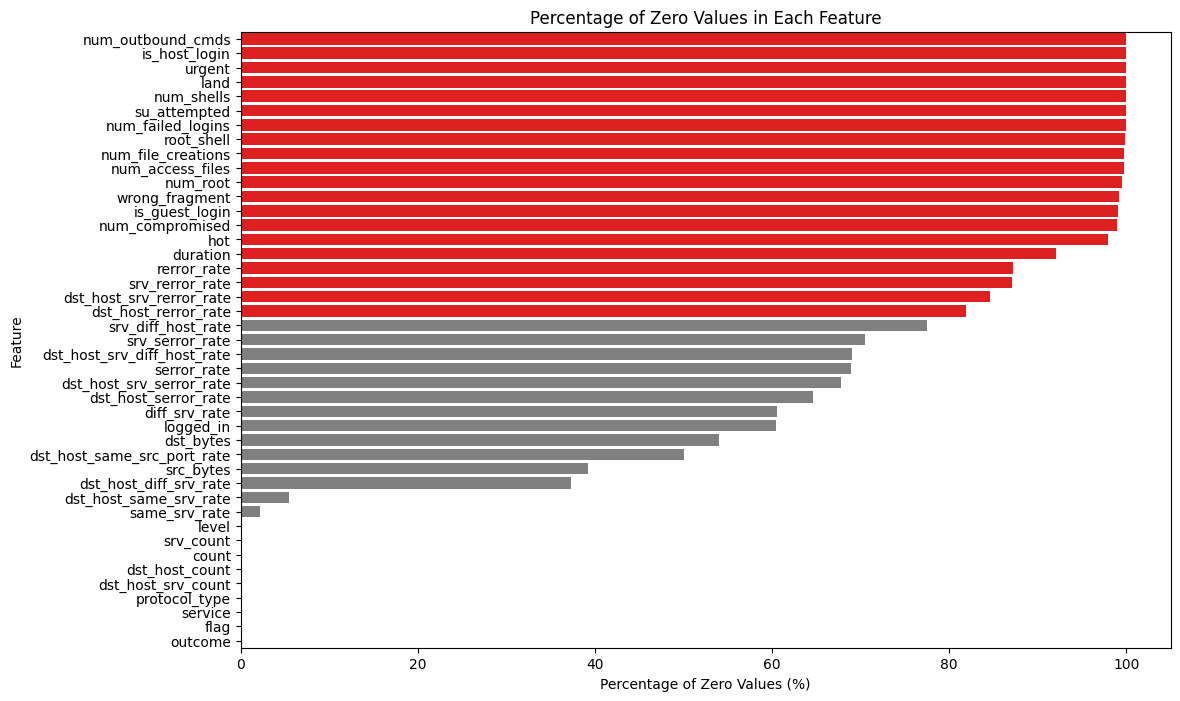

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

zero_percentage = (data_train[columns] == 0).mean() * 100

zero_percentage_df = pd.DataFrame(zero_percentage, columns=['Zero_Percentage'])
zero_percentage_df = zero_percentage_df.reset_index()
zero_percentage_df.columns = ['Feature', 'Zero_Percentage']


zero_percentage_df = zero_percentage_df.sort_values('Zero_Percentage', ascending=False)

zero_percentage_df['Color'] = zero_percentage_df['Zero_Percentage'].apply(lambda x: 'red' if x > 80 else 'grey')

palette = zero_percentage_df['Color'].tolist()


plt.figure(figsize=(12, 8))
sns.barplot(x='Zero_Percentage', y='Feature', data=zero_percentage_df, palette=palette)


plt.title('Percentage of Zero Values in Each Feature')
plt.xlabel('Percentage of Zero Values (%)')
plt.ylabel('Feature')

plt.show()


In [ ]:
columns_to_drop = zero_percentage_df[zero_percentage_df['Zero_Percentage'] > 80]['Feature'].tolist()
data_train_cleaned = data_train.drop(columns=columns_to_drop)
test_data_cleaned = data_test.drop(columns=columns_to_drop)


In [ ]:
data_train_cleaned.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,normal,20
1,udp,other,SF,146,0,0,13,1,0.0,0.0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal,15
2,tcp,private,S0,0,0,0,123,6,1.0,1.0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,neptune,19
3,tcp,http,SF,232,8153,1,5,5,0.2,0.2,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,normal,21
4,tcp,http,SF,199,420,1,30,32,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
outcome_counts = data_train_cleaned['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['protocol_type', 'service', 'flag']

for column in columns_to_encode:
    data_train_cleaned[column] = label_encoder.fit_transform(data_train_cleaned[column])
    test_data_cleaned[column] = label_encoder.transform(test_data_cleaned[column])

In [ ]:
data_train_cleaned.head()



,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,20,9,491,0,0,2,2,0.0,0.0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,normal,20
1,2,44,9,146,0,0,13,1,0.0,0.0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal,15
2,1,49,5,0,0,0,123,6,1.0,1.0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,neptune,19
3,1,24,9,232,8153,1,5,5,0.2,0.2,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,normal,21
4,1,24,9,199,420,1,30,32,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
test_data_cleaned.head()


,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,49,1,0,0,0,229,10,0.0,0.00,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,neptune,21
1,1,49,1,0,0,0,136,1,0.0,0.00,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,neptune,21
2,1,20,9,12983,0,0,1,1,0.0,0.00,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,normal,21
3,0,14,9,20,0,0,1,65,0.0,0.00,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,saint,15
4,1,60,2,0,15,0,1,8,0.0,0.12,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,mscan,11


In [ ]:
outcome_counts = data_train_cleaned['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
columns_to_analyze = data_train_cleaned.columns


for column in columns_to_analyze:
    print(f"\nValue counts for column '{column}':")
    print(data_train_cleaned[column].value_counts())
    print("="*50)


Value counts for column 'protocol_type':
protocol_type
1    102689
2     14993
0      8291
Name: count, dtype: int64

Value counts for column 'service':
service
24    40338
49    21853
12     9043
54     7313
20     6860
      ...  
61        3
27        2
3         2
22        2
25        1
Name: count, Length: 70, dtype: int64

Value counts for column 'flag':
flag
9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: count, dtype: int64

Value counts for column 'src_bytes':
src_bytes
0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
1940         1
12973        1
1899         1
1661         1
2358         1
Name: count, Length: 3341, dtype: int64

Value counts for column 'dst_bytes':
dst_bytes
0        67967
105       1497
8314       888
330        528
331        512
         ...  
30114        1
3885         1
33116        1
4056         1
52866        1
Name: 

In [ ]:
columns_to_analyze

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'outcome', 'level'],
      dtype='object')

In [ ]:
data_train_cleaned.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'outcome', 'level'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=['service', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'level']


scaler = MinMaxScaler()

data_train_cleaned[columns_to_scale] = scaler.fit_transform(data_train_cleaned[columns_to_scale])
test_data_cleaned[columns_to_scale] = scaler.transform(test_data_cleaned[columns_to_scale])




In [ ]:
data_train_cleaned.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,0.289855,9,3.558064e-07,0.000000e+00,0,0.003914,0.003914,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,normal,0.952381
1,2,0.637681,9,1.057999e-07,0.000000e+00,0,0.025440,0.001957,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,normal,0.714286
2,1,0.710145,5,0.000000e+00,0.000000e+00,0,0.240705,0.011742,1.0,1.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,neptune,0.904762
3,1,0.347826,9,1.681203e-07,6.223962e-06,1,0.009785,0.009785,0.2,0.2,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,normal,1.000000
4,1,0.347826,9,1.442067e-07,3.206260e-07,1,0.058708,0.062622,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,normal,1.000000


In [ ]:
test_data_cleaned.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,0.710145,1,0.000000e+00,0.000000e+00,0,0.448141,0.019569,0.0,0.00,...,1.000000,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,neptune,1.000000
1,1,0.710145,1,0.000000e+00,0.000000e+00,0,0.266145,0.001957,0.0,0.00,...,1.000000,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,neptune,1.000000
2,1,0.289855,9,9.408217e-06,0.000000e+00,0,0.001957,0.001957,0.0,0.00,...,0.525490,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,normal,1.000000
3,0,0.202899,9,1.449313e-08,0.000000e+00,0,0.001957,0.127202,0.0,0.00,...,0.011765,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,saint,0.714286
4,1,0.869565,2,0.000000e+00,1.145093e-08,0,0.001957,0.015656,0.0,0.12,...,0.113725,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,mscan,0.523810


# **convert data to multi classification**

In [ ]:
outcome_counts = data_train_cleaned['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
outcome_counts = test_data_cleaned['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,9711
neptune,4657
guess_passwd,1231
mscan,996
warezmaster,944
apache2,737
satan,735
processtable,685
smurf,665


*   httptuneel
*   xterm
*   SQLattack
*   ps

**there is no data in train so we did not include these four classes in multi-class classifcation**

*   buffer_overflow
*   rootkit
*   loadmodule
*   perl

**these four classes are duplicates in class 2 and 4 but  added these into class 4 only because for other 4 classes defined in paper has no data n tran data**

In [ ]:
# Define the correct mapping for each class
class_mapping = {
    'normal': 0,
    'back': 1, 'land': 1, 'teardrop': 1, 'neptune': 1, 'pod': 1, 'smurf': 1,
    'buffer_overflow': 4, 'ftp_write': 2, 'guess_passwd': 2, 'imap': 2,
    'loadmodule': 4, 'multihop': 2, 'perl': 4, 'phf': 2,
    'rootkit': 4, 'spy': 2, 'warezclient': 2, 'warezmaster': 2,
    'ipsweep': 3, 'nmap': 3, 'portsweep': 3, 'satan': 3
}

# Apply the mapping to the 'outcome' column in both training and test datasets
data_train_cleaned['outcome'] = data_train_cleaned['outcome'].map(class_mapping).fillna(0).astype(int)
test_data_cleaned['outcome'] = test_data_cleaned['outcome'].map(class_mapping).fillna(0).astype(int)

# Display the value counts to verify
print("Value counts for data_train 'outcome' column:")
print(data_train_cleaned['outcome'].value_counts())

print("\nValue counts for test_data 'outcome' column:")
print(test_data_cleaned['outcome'].value_counts())


Value counts for data_train 'outcome' column:
outcome
0    67343
1    45927
3    11656
2      995
4       52
Name: count, dtype: int64

Value counts for test_data 'outcome' column:
outcome
0    13461
1     5741
2     2199
3     1106
4       37
Name: count, dtype: int64


In [ ]:
columns_to_analyze = data_train_cleaned.columns
for column in columns_to_analyze:
    print(f"\nValue counts for column '{column}':")
    print(data_train_cleaned[column].value_counts())
    print("="*50)


Value counts for column 'protocol_type':
protocol_type
1    102689
2     14993
0      8291
Name: count, dtype: int64

Value counts for column 'service':
service
0.347826    40338
0.710145    21853
0.173913     9043
0.782609     7313
0.289855     6860
            ...  
0.884058        3
0.391304        2
0.043478        2
0.318841        2
0.362319        1
Name: count, Length: 70, dtype: int64

Value counts for column 'flag':
flag
9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: count, dtype: int64

Value counts for column 'src_bytes':
src_bytes
0.000000e+00    49392
5.797253e-09     3691
7.246566e-10     2432
3.188489e-08     2334
3.260955e-08     2089
                ...  
1.405834e-06        1
9.400971e-06        1
1.376123e-06        1
1.203655e-06        1
1.708740e-06        1
Name: count, Length: 3341, dtype: int64

Value counts for column 'dst_bytes':
dst_bytes
0.000000e+00    67967
8.0156

In [ ]:
columns_to_analyze

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'outcome', 'level'],
      dtype='object')

In [ ]:
data_train_cleaned.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'outcome', 'level'],
      dtype='object')

In [ ]:
X_train = data_train_cleaned.drop(columns=['outcome'])
y_train = data_train_cleaned['outcome']

X_test = test_data_cleaned.drop(columns=['outcome'])

y_test = test_data_cleaned['outcome']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
print("Original training data shape:", X_train.shape)
X_train, y_train = smote.fit_resample(X_train, y_train)


print("Resampled training data shape:", X_train.shape)


Original training data shape: (125973, 22)
Resampled training data shape: (336715, 22)


In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

# **MLP Multi-class classification**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mlp_model_multi = Sequential()

mlp_model_multi.add(Input(shape=(X_train.shape[1],)))
mlp_model_multi.add(Dense(64, activation='relu'))
mlp_model_multi.add(Dropout(0.5))
mlp_model_multi.add(Dense(32, activation='relu'))
mlp_model_multi.add(BatchNormalization())
mlp_model_multi.add(Dropout(0.4))
mlp_model_multi.add(Dense(16, activation='relu'))
mlp_model_multi.add(Dropout(0.4))
mlp_model_multi.add(Dense(5, activation='softmax'))


mlp_model_multi.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


history_multi = mlp_model_multi.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
10523/10523 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7280 - loss: 0.6990 - val_accuracy: 0.8019 - val_loss: 1.0296
Epoch 2/15
10523/10523 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9256 - loss: 0.2422 - val_accuracy: 0.8140 - val_loss: 1.0176
Epoch 3/15
10523/10523 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9378 - loss: 0.2088 - val_accuracy: 0.8239 - val_loss: 0.9262
Epoch 4/15
10523/10523 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9431 - loss: 0.1923 - val_accuracy: 0.8203 - val_loss: 1.0648
Epoch 5/15
10523/10523 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9470 - loss: 0.1800 - val_accuracy: 0.8149 - val_loss: 1.2156
Epoch 6/15
10523/10523 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9475 - loss: 0.1797 - val_accuracy: 0.8271 - val_loss: 1.1628
Epoch 7/15
10523/10523 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9505 - loss: 0.1701 - val_accuracy: 0.8292 - val_loss: 1.0706
Epoch 8/15
10523/10523 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8059794180269695
Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.78      0.85     13461
         DoS       0.85      0.97      0.91      5741
         R2L       0.79      0.45      0.58      2199
       Probe       0.34      1.00      0.51      1106
         U2R       0.07      0.59      0.13        37

    accuracy                           0.81     22544
   macro avg       0.60      0.76      0.60     22544
weighted avg       0.87      0.81      0.82     22544



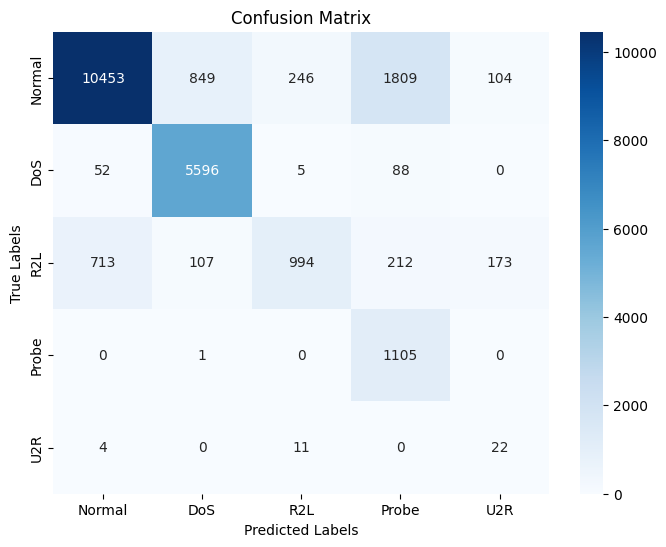

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = mlp_model_multi.predict(X_test)


y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_test_classes = tf.argmax(y_test, axis=1).numpy()

accuracy = accuracy_score(y_test_classes, y_pred_classes)

print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,target_names=["Normal", "DoS", "R2L", "Probe", "U2R"]))


conf_matrix=confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=["Normal", "DoS", "R2L", "Probe", "U2R"], yticklabels=["Normal", "DoS", "R2L", "Probe", "U2R"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy: 0.7838449254790631
Classification Report:
              precision    recall  f1-score   support

      Normal       0.87      0.80      0.84     13461
         DoS       0.81      0.98      0.88      5741
         R2L       0.84      0.17      0.28      2199
       Probe       0.33      0.79      0.47      1106
         U2R       0.12      0.27      0.17        37

    accuracy                           0.78     22544
   macro avg       0.59      0.60      0.53     22544
weighted avg       0.82      0.78      0.77     22544



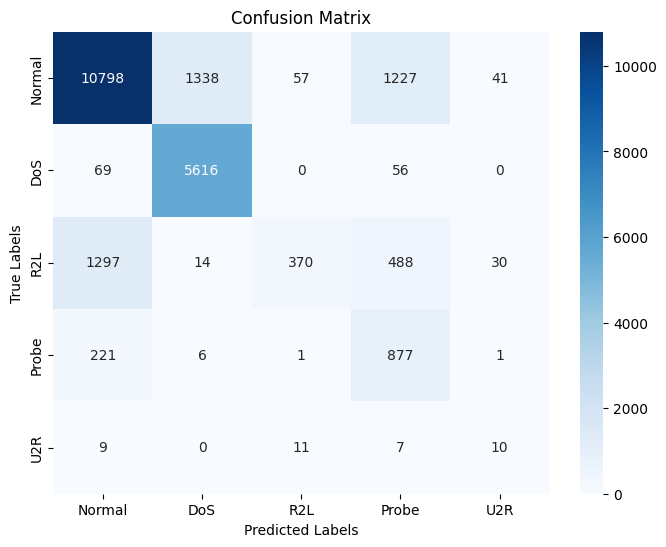

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train_classes)


y_pred_classes = dt_model.predict(X_test)


accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=["Normal", "DoS", "R2L", "Probe", "U2R"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=["Normal", "DoS", "R2L", "Probe", "U2R"], yticklabels=["Normal", "DoS", "R2L", "Probe", "U2R"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


XGBoost Accuracy: 0.840888928317956
XGBoost Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.84      0.87     13461
         DoS       0.88      0.99      0.94      5741
         R2L       0.93      0.35      0.50      2199
       Probe       0.44      1.00      0.61      1106
         U2R       0.14      0.38      0.20        37

    accuracy                           0.84     22544
   macro avg       0.66      0.71      0.62     22544
weighted avg       0.87      0.84      0.84     22544



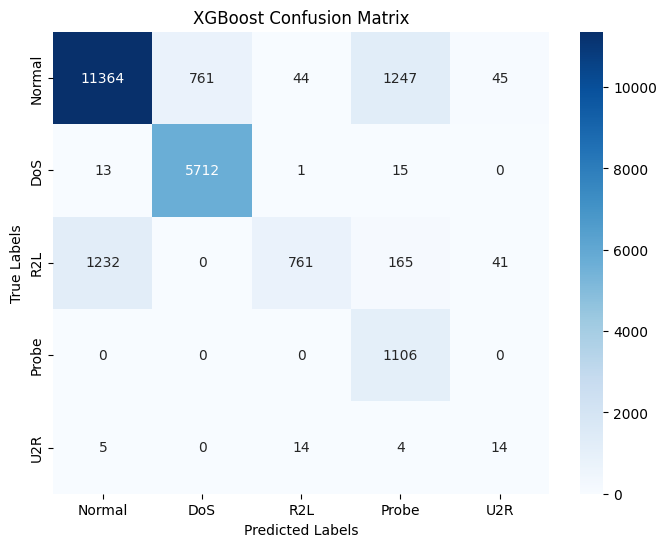

In [ ]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

xgboost_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)
xgboost_model.fit(X_train, y_train_classes)
y_pred_classes_xgb = xgboost_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test_classes, y_pred_classes_xgb)
print("XGBoost Accuracy:", accuracy_xgb)


print("XGBoost Classification Report:")
print(classification_report(y_test_classes, y_pred_classes_xgb, target_names=["Normal", "DoS", "R2L", "Probe", "U2R"]))


conf_matrix_xgb = confusion_matrix(y_test_classes, y_pred_classes_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='g', cmap='Blues', xticklabels=["Normal", "DoS", "R2L", "Probe", "U2R"], yticklabels=["Normal", "DoS", "R2L", "Probe", "U2R"])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
